In [1]:
import numpy as np
#from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


from sklearn.decomposition import TruncatedSVD, PCA
import matplotlib.pyplot as plt
import seaborn as sns
import umap 
#import umap 


KeyboardInterrupt: 

In [5]:
#Set seed
seed=42

In [ ]:
def Visual_comp(data_t,n_var,clusters,tag):
    #Plot first two components of given reduction algorithm and colors points according to given cluster
    col=[]
    for i in range(1,n_var+1):
        name='Component_'+str(i)
        col.append(name)
    pc_df = pd.DataFrame(data =data_t , columns =col ) 
    pc_df['Cluster'] =clusters
    pc_df.head()
    #plot pca
    sns.lmplot( x="Component_1", y="Component_2",
    data=pc_df, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='Cluster', # color by cluster
    legend=True,
    scatter_kws={"s": 80}).set(title='First two components of '+tag)
  
    return pc_df

# Load METABRIC

Load data from metabric:

* Exprexpression dat

* CNV


In [ ]:
#Expression
data_exp=pd.read_csv("/CTGlab/data/brca_metabric/data_mrna_illumina_microarray_zscores_ref_diploid_samples.txt",sep='\t')
#CNV
data_cnv=pd.read_csv("/CTGlab/data/brca_metabric/data_cna.txt",sep='\t')

In [ ]:
data_exp

Hugo_Symbol  Entrez_Gene_Id  MB-0362  MB-0346  MB-0386  MB-0574  \
0            RERE             473  -0.7139   1.2266  -0.0053  -0.4399   
1          RNF165          494470  -0.4606   0.3564  -0.6800  -1.0563   
2            PHF7           51533  -0.3325  -1.0617   0.2587  -0.2982   
3           CIDEA            1149  -0.0129  -1.0394   3.2991  -0.2632   
4           TENT2          167153  -0.7853   0.0337  -0.6649   2.1640   
...           ...             ...      ...      ...      ...      ...   
20598       VPS72            6944  -0.2908   0.3443   0.4818   0.2503   
20599       CSMD3          114788  -0.5286  -0.4379   6.9258   1.0466   
20600      CC2D1A           54862   0.0068  -0.7520   0.0519   0.2502   
20601       IGSF9           57549   0.4053   1.2968   0.7962  -0.1634   
20602      FAM71A          149647  -1.1278   0.0321   0.6608  -0.3571   

       MB-0185  MB-0503  MB-0641  MB-0201  ...  MB-6192  MB-4820  MB-5527  \
0      -0.5958   0.4729   0.4974  -1.1900  ...  -0.4596   1.8975   1.1120   
1      -0.0377  -0.6829  -0.2854  -0.4336  ...  -1.0927   0.9103  -0.0023   
2      -1.2422   0.0558  -0.5011  -0.6418  ...  -0.0725   0.7219   0.1402   
3      -1.0949   1.2628   2.0796  -0.8310  ...   0.0679  -0.7126  -0.1523   
4      -0.2031   1.0304   0.6046  -1.7557  ...   0.6400  -0.1102   1.2719   
...        ...      ...      ...      ...  ...      ...      ...      ...   
20598  -0.1057  -0.1657  -0.4730   1.4719  ...  -0.9195  -1.4857  -1.4543   
20599  -0.1060   0.3284   0.0993  -0.1987  ...  -0.3776  -0.6366  -0.0607   
20600  -0.3376  -0.4705  -0.6036  -1.1946  ...  -0.5877  -1.1169  -0.5420   
20601  -0.2418  -0.2545  -0.9814   1.9240  ...  -0.6217  -1.5481  -1.2088   
20602  -1.0923  -1.2238  -0.9668  -1.3778  ...  -0.4746   1.4956   2.2203   

       MB-5167  MB-5465  MB-5453  MB-5471  MB-5127  MB-4313  MB-4823  
0       1.1942  -1.7974   1.1339   0.0259  -0.3529  -1.2327   1.7217  
1      -0.2898   3.5763   1.3429   0.5726   0.1731   0.5482   1.2239  
2       0.8718  -0.9275  -0.0587   0.5240  -0.0311   4.4925  -0.2173  
3      -0.7593  -0.7141  -0.4324  -0.0336  -0.4003   2.4698  -0.7268  
4       0.8178  -1.0301   0.6082   0.5608   2.4222  -3.2853   0.4181  
...        ...      ...      ...      ...      ...      ...      ...  
20598   0.3791  -0.3989  -1.5529  -0.6349  -0.8160  -1.0902  -0.2811  
20599  -0.0475   0.2231   0.0706   0.1188  -0.3231  -0.1251  -0.4265  
20600   0.2947  -0.2800   2.5337  -0.8272  -0.1200   4.2708  -1.0090  
20601   0.4594   0.3821   0.3254   0.8187  -0.5648   0.5931   0.9043  
20602   0.3532  -0.2418   0.5514  -0.9335   0.1794   0.0860   0.4096  

[20603 rows x 1982 columns]

Load meta data (Clinical data)

In [ ]:
data_clin=pd.read_csv("/CTGlab/data/brca_metabric/data_clinical_sample.txt",sep='\t',skiprows=4)

In [ ]:
data_clin.set_index('SAMPLE_ID',inplace=True)

In [11]:
data_clin

PATIENT_ID    CANCER_TYPE  \
SAMPLE_ID                             
MB-0000      MB-0000  Breast Cancer   
MB-0002      MB-0002  Breast Cancer   
MB-0005      MB-0005  Breast Cancer   
MB-0006      MB-0006  Breast Cancer   
MB-0008      MB-0008  Breast Cancer   
...              ...            ...   
MTS-T2428  MTS-T2428  Breast Cancer   
MTS-T2429  MTS-T2429  Breast Cancer   
MTS-T2430  MTS-T2430  Breast Cancer   
MTS-T2431  MTS-T2431  Breast Cancer   
MTS-T2432  MTS-T2432  Breast Cancer   

                                CANCER_TYPE_DETAILED ER_STATUS HER2_STATUS  \
SAMPLE_ID                                                                    
MB-0000             Breast Invasive Ductal Carcinoma  Positive    Negative   
MB-0002             Breast Invasive Ductal Carcinoma  Positive    Negative   
MB-0005             Breast Invasive Ductal Carcinoma  Positive    Negative   
MB-0006    Breast Mixed Ductal and Lobular Carcinoma  Positive    Negative   
MB-0008    Breast Mixed Ductal and Lobular Carcinoma  Positive    Negative   
...                                              ...       ...         ...   
MTS-T2428                  Invasive Breast Carcinoma  Positive         NaN   
MTS-T2429                  Invasive Breast Carcinoma  Positive         NaN   
MTS-T2430                  Invasive Breast Carcinoma       NaN         NaN   
MTS-T2431                  Invasive Breast Carcinoma       NaN         NaN   
MTS-T2432                  Invasive Breast Carcinoma       NaN         NaN   

           GRADE ONCOTREE_CODE PR_STATUS SAMPLE_TYPE  TUMOR_SIZE  TUMOR_STAGE  \
SAMPLE_ID                                                                       
MB-0000      3.0           IDC  Negative     Primary        22.0          2.0   
MB-0002      3.0           IDC  Positive     Primary        10.0          1.0   
MB-0005      2.0           IDC  Positive     Primary        15.0          2.0   
MB-0006      2.0          MDLC  Positive     Primary        25.0          2.0   
MB-0008      3.0          MDLC  Positive     Primary        40.0          2.0   
...          ...           ...       ...         ...         ...          ...   
MTS-T2428    1.0          BRCA       NaN     Primary        27.0          1.0   
MTS-T2429    2.0          BRCA       NaN     Primary        28.0          2.0   
MTS-T2430    NaN          BRCA       NaN     Primary         NaN          0.0   
MTS-T2431    NaN          BRCA       NaN     Primary         NaN          0.0   
MTS-T2432    NaN          BRCA       NaN     Primary         NaN          0.0   

           TMB_NONSYNONYMOUS  
SAMPLE_ID                     
MB-0000             0.000000  
MB-0002             2.615035  
MB-0005             2.615035  
MB-0006             1.307518  
MB-0008             2.615035  
...                      ...  
MTS-T2428           2.615035  
MTS-T2429           5.230071  
MTS-T2430           7.845106  
MTS-T2431           9.152624  
MTS-T2432           6.537589  

[2509 rows x 12 columns]

In [ ]:
#bind index colums
data_exp['hugo_entrez_combo']=data_exp.Hugo_Symbol+'_'+data_exp.Entrez_Gene_Id.astype(str)
data_cnv['hugo_entrez_combo']=data_cnv.Hugo_Symbol+'_'+data_cnv.Entrez_Gene_Id.astype(str)
data_exp.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)
data_cnv.drop(['Hugo_Symbol','Entrez_Gene_Id'],axis=1,inplace=True)

Select samples presentin both datasets

In [ ]:
samples=list(set(data_exp.columns) & set(data_cnv.columns))
data_exp_sub=data_exp[samples]
data_cnv_sub=data_cnv[samples]
samples.remove('hugo_entrez_combo')

In [ ]:
data_clin=data_clin[data_clin.index.isin(samples)]


In [ ]:
print('RNA data dim:',data_exp_sub.shape)
print('CNA data dim:',data_cnv_sub.shape)

RNA data dim: (20603, 1981)
CNA data dim: (22544, 1981)


In [16]:
gene_com_id=list(set(data_exp_sub.hugo_entrez_combo) & set(data_cnv_sub.hugo_entrez_combo))
print('common features: ',len(gene_com_id))

common features:  0


In [17]:
data_exp_sub.drop('hugo_entrez_combo',axis=1).describe()

MB-6152       MB-0100       MB-0642       MB-0242       MB-5656  \
count  20603.000000  20603.000000  20603.000000  20603.000000  20603.000000   
mean       0.004758      0.042141      0.008782     -0.049358     -0.038124   
std        0.922322      1.086314      1.032138      0.778435      0.816274   
min       -3.438300     -3.846300     -4.280700     -3.309500     -3.444900   
25%       -0.596200     -0.665400     -0.709500     -0.569900     -0.570300   
50%       -0.065900     -0.060100     -0.087000     -0.100200     -0.065400   
75%        0.556100      0.617750      0.620700      0.437000      0.479450   
max        7.981800      9.933100      7.945500      5.285700     12.288100   

            MB-0589       MB-7018       MB-0211       MB-0616       MB-5027  \
count  20603.000000  20603.000000  20603.000000  20603.000000  20603.000000   
mean      -0.020373     -0.035922     -0.047505      0.015713     -0.055990   
std        0.915520      0.819061      0.983130      1.010582      0.767469   
min       -3.789200     -3.530100     -4.619800     -3.962800     -3.773900   
25%       -0.629450     -0.589600     -0.695550     -0.624850     -0.557400   
50%       -0.082400     -0.088500     -0.162100     -0.080500     -0.090600   
75%        0.529650      0.464550      0.507100      0.554800      0.415800   
max       10.314400      6.153000     10.435600     25.975600      7.733400   

       ...       MB-4697       MB-7029       MB-0901       MB-7142  \
count  ...  20603.000000  20603.000000  20603.000000  20603.000000   
mean   ...     -0.010202     -0.042307      0.086030     -0.000578   
std    ...      0.899076      0.794486      1.222724      0.926474   
min    ...     -4.145600     -3.873700     -4.264400     -3.778000   
25%    ...     -0.594350     -0.555350     -0.751650     -0.636350   
50%    ...     -0.076500     -0.090500     -0.039200     -0.068900   
75%    ...      0.513000      0.430250      0.814400      0.562250   
max    ...      8.587700      8.642300      9.331400      7.964800   

            MB-0059       MB-6059       MB-4098       MB-7241       MB-4762  \
count  20603.000000  20603.000000  20603.000000  20603.000000  20603.000000   
mean       0.013485     -0.035365      0.159509     -0.047755     -0.014698   
std        0.919161      0.842873      1.911565      0.897459      0.884830   
min       -3.738500     -4.248100     -7.074400     -4.128700     -4.031800   
25%       -0.618400     -0.582750     -1.064300     -0.648700     -0.624350   
50%       -0.055200     -0.081000     -0.063100     -0.139600     -0.076900   
75%        0.591450      0.490750      1.277300      0.483150      0.537950   
max        6.800600      8.106100     17.526400      9.506800      6.788000   

            MB-6228  
count  20603.000000  
mean      -0.042232  
std        0.871830  
min       -4.972400  
25%       -0.618450  
50%       -0.112000  
75%        0.484100  
max        6.843600  

[8 rows x 1980 columns]

Reset index and replace nan values

In [18]:
#SET hugo+entrez as index
data_exp_sub.set_index('hugo_entrez_combo',inplace=True)
data_cnv_sub.set_index('hugo_entrez_combo',inplace=True)
#drop nan
if data_exp_sub.isnull().values.any():
    data_exp_sub=data_exp_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

if data_cnv_sub.isnull().values.any():
    data_cnv_sub=data_cnv_sub.apply(lambda x: x.fillna(x.mean()),axis=0)

In [19]:
data_exp_sub.isnull().values.any()

False

In [23]:
data_clin_patient=pd.read_csv('/CTGlab/data/brca_metabric/data_clinical_patient.txt',sep='\t',skiprows=4,index_col='PATIENT_ID')
ic10=data_clin_patient['INTCLUST']
ic10.dropna(inplace=True)
ic10.unique()
ic10.replace('4ER+','4',inplace=True)
ic10.replace('4ER-','4',inplace=True)

## CNV Encoding

**TF-IDF**

Try using tf-idf transformation--> Normalization highly used in text document analysis which " weights " terms/features according to occurence-> if a term is less comon is more informative

In [18]:
sign_cnv=np.sign(data_cnv_sub)
abs_cnv=np.abs(sign_cnv)

In [19]:
transformer = TfidfTransformer(smooth_idf=True)
tdfidf_cnv=transformer.fit_transform(np.abs(data_cnv_sub.T))

# Dimensionality reduction

## PCA and SVD

We reduce each dataset separatelly and then take most relevant components from each one.
Take in mind how many qubits you want to use in order to reduce properly the data-set.
Here we want to use 4 qubits and thus use 2 pc for omics.

In [20]:
n_comp=5

In [21]:
#For EXP
pca_exp= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_exp.fit(data_exp_sub.T)
X_pca_exp=pca_exp.transform(data_exp_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_exp.shape))

#For CNV
pca_cnv= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_cnv.fit(data_cnv_sub.T)
X_pca_cnv=pca_cnv.transform(data_cnv_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_cnv.shape))

#For CNV TF-IDF
svd_cnv=TruncatedSVD(n_components=n_comp,random_state=seed)
svd_cnv.fit(tdfidf_cnv)
X_svd_cnv=svd_cnv.transform(tdfidf_cnv)
print("X truncated is a sparse matrix with shape: %s" % str(X_svd_cnv.shape))

X truncated is a sparse matrix with shape: (1980, 5)
X truncated is a sparse matrix with shape: (1980, 5)
X truncated is a sparse matrix with shape: (1980, 5)


######### For exp #########
First 2 comp exp: 0.7712995672968188 % variance
3 components explain 90% of the variance
######### For CNA #########
First 2 comp cna: 0.779278772305851 % variance
3 components explain 90% of the variance
######### For CNA TDF-IDF #########
First 2 comp cna tdf-idf: 0.7528188775637744 % variance
4 components explain 90% of the variance


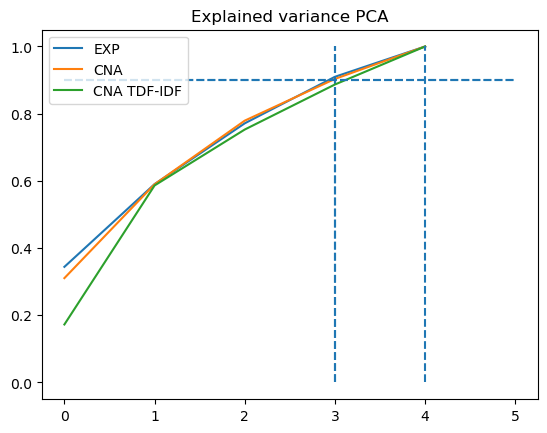

In [25]:
#For EXPR
ev_cumsum = np.cumsum(pca_exp.explained_variance_)/(pca_exp.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print ('######### For exp #########')
print('First 2 comp exp: {} % variance'.format(ev_cumsum[2]))
print ('{} components explain 90% of the variance'.format(ev_at90))
plt.title('Explained variance for expr PCA')
plt.plot(ev_cumsum,label='EXP')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')




#For CNA
ev_cumsum= np.cumsum(pca_cnv.explained_variance_)/(pca_cnv.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print ('######### For CNA #########')
print('First 2 comp cna: {} % variance'.format(ev_cumsum[2]))
print ('{} components explain 90% of the variance'.format(ev_at90))
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 5, linestyles='dashed')
plt.legend()


#For CNA TDF-IDF
ev_cumsum= np.cumsum(svd_cnv.explained_variance_)/(svd_cnv.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print ('######### For CNA TDF-IDF #########')
print('First 2 comp cna tdf-idf: {} % variance'.format(ev_cumsum[2]))
print ('{} components explain 90% of the variance'.format(ev_at90))
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA TDF-IDF')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 5, linestyles='dashed')
plt.legend()


## Visualize compresed data

In [ ]:
data_clin

In [ ]:
df_pca_cna=Visual_comp(X_pca_cnv,n_comp,list(data_clin.GRADE),tag='CNA PCA')
df_pca_exp=Visual_comp(X_pca_exp,n_comp,list(data_clin.GRADE),tag='Expression PCA')


## UMAP

In [20]:
data_full=data_exp_sub.T.join(data_cnv_sub.T,how='inner')
data_full

hugo_entrez_combo  RERE_473  RNF165_494470  PHF7_51533  CIDEA_1149  \
MB-6152             -0.9437         0.4291     -0.0453     -0.7075   
MB-0100             -0.5710         1.9778      0.4454      1.3685   
MB-0642              1.4711         0.2000      0.1861     -0.8742   
MB-0242             -0.3895        -0.3285     -0.4112      1.3068   
MB-5656              2.2687         0.7594     -0.4237     -0.5309   
...                     ...            ...         ...         ...   
MB-6059             -1.6124        -1.0763     -0.5274     -0.3685   
MB-4098              0.6951         3.6394      4.1859     -0.8940   
MB-7241              0.4532        -1.3201      0.4519      0.3763   
MB-4762              1.4620         0.3285      1.1536     -0.9383   
MB-6228              0.2427         0.3128     -0.7454     -0.6474   

hugo_entrez_combo  TENT2_167153  SLC17A3_10786  SDS_10993  ATP6V1C2_245973  \
MB-6152                 -1.3802         0.0897     1.5197           0.5167   
MB-0100                 -0.2766         0.2501    -1.5297           0.8223   
MB-0642                  0.6416         1.1413    -1.0357          -0.3165   
MB-0242                  1.3883         0.7556     0.5304          -0.2241   
MB-5656                  0.4074        -1.0867    -1.1013           0.0687   
...                         ...            ...        ...              ...   
MB-6059                 -0.1319        -1.3788     2.1513          -0.1473   
MB-4098                 -3.1751         0.6388    -0.5048          -0.5433   
MB-7241                 -0.0818        -0.1590    -0.4938          -0.4631   
MB-4762                  0.1098         0.4391    -0.9220           0.1056   
MB-6228                  0.2305        -0.0715     0.0277          -0.1662   

hugo_entrez_combo  F3_2152  FAM71C_196472  ...  ZWILCH_55055.0  ZWINT_11130.0  \
MB-6152             0.6049         0.2022  ...            -1.0           -1.0   
MB-0100            -0.1856         0.7829  ...             0.0           -1.0   
MB-0642            -0.8164         0.9542  ...             0.0            0.0   
MB-0242            -0.5488         0.6259  ...             0.0            0.0   
MB-5656             1.7313         0.3483  ...             0.0            0.0   
...                    ...            ...  ...             ...            ...   
MB-6059             1.0931         0.0776  ...             0.0            0.0   
MB-4098            -0.7525        -0.1344  ...             0.0            0.0   
MB-7241             0.4196        -0.0872  ...             0.0            0.0   
MB-4762            -0.2945        -0.2603  ...             0.0            0.0   
MB-6228             0.7042         2.0118  ...             0.0            0.0   

hugo_entrez_combo  ZXDA_7789.0  ZXDB_158586.0  ZXDC_79364.0  ZYG11A_nan  \
MB-6152                    0.0            0.0           0.0         0.0   
MB-0100                    1.0            1.0           0.0         0.0   
MB-0642                    0.0            0.0           1.0         0.0   
MB-0242                    1.0            1.0           0.0         0.0   
MB-5656                    0.0            0.0           0.0         0.0   
...                        ...            ...           ...         ...   
MB-6059                    0.0            0.0          -1.0         0.0   
MB-4098                    0.0            0.0           0.0         0.0   
MB-7241                    0.0            0.0           0.0         0.0   
MB-4762                    0.0            0.0           0.0         0.0   
MB-6228                    0.0            0.0           0.0         0.0   

hugo_entrez_combo  ZYG11B_79699.0  ZYX_7791.0  ZZEF1_23140.0  ZZZ3_26009.0  
MB-6152                       0.0        -1.0           -1.0           0.0  
MB-0100                       0.0         0.0            0.0           0.0  
MB-0642                       0.0         0.0            1.0           0.0  
MB-0242                       0.0       

In [50]:
mapper=umap.UMAP(n_components=4, random_state=seed).fit(data_full)
data_umap= mapper.transform(data_full)

Plot with ic10

In [51]:
col_umap=[]
for i in range(1,data_umap.shape[1]+1):
    col_umap.append('Component_{}'.format(i))
data_umap_df=pd.DataFrame(data_umap,columns=col_umap,index=data_full.index)
data_umap_df=data_umap_df.join(ic10.astype(int),how='inner')
data_umap_df.rename(columns={'INTCLUST':'IntClustMemb'},inplace=True)


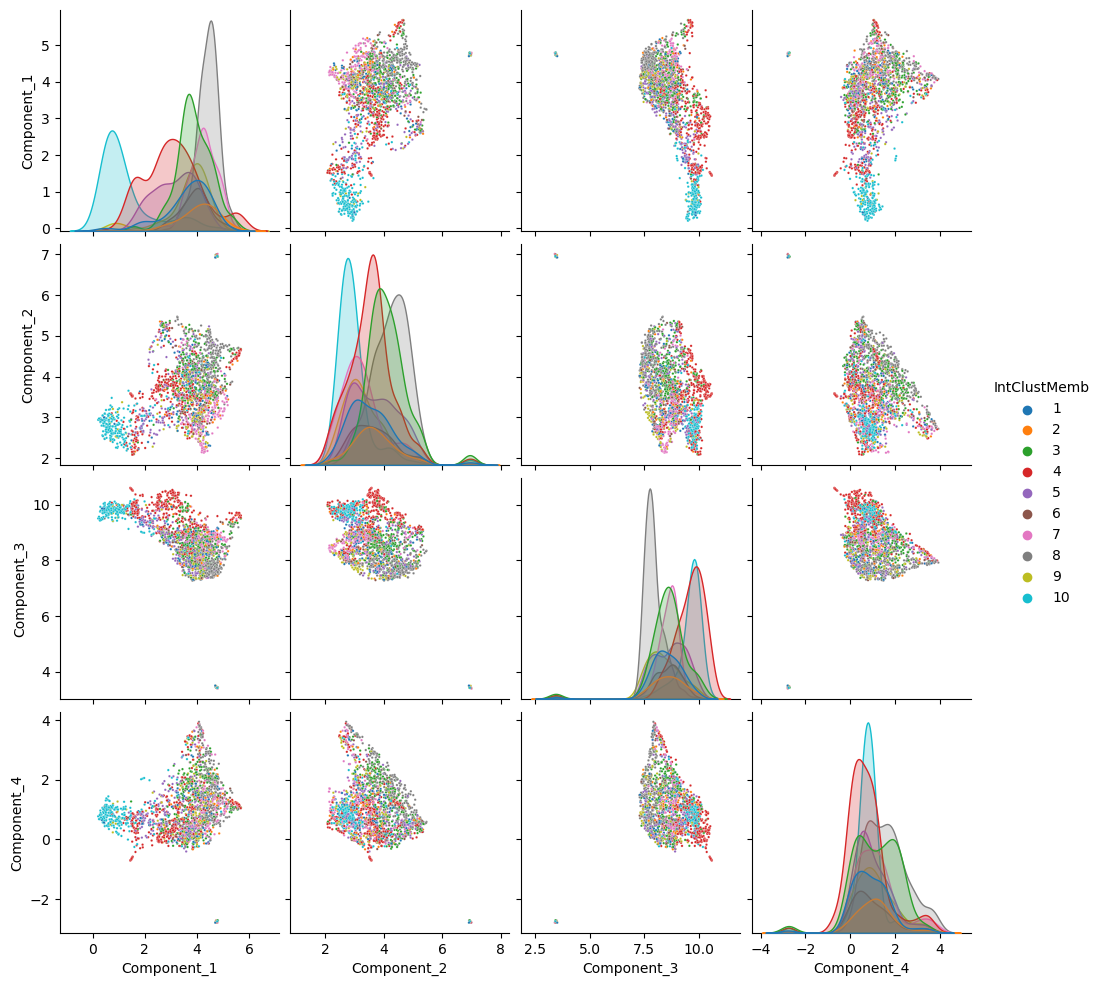

In [52]:
sns.pairplot(data_umap_df,hue='IntClustMemb',palette='tab10',plot_kws={"s": 3})

In [ ]:
#save ic10
data_umap_df.to_csv('./UMAP_METABRIC_4cmp_IC10_full.csv',sep=',')

### Optimize umap

In [28]:
#Load opt grid
opt_umap=pd.read_csv('opt_umap.csv')
opt_umap.head()

Unnamed: 0  n_neighbour  min_d  spread  clustering_score
0           0            5   0.05    0.25         -0.029666
1           1            5   0.05    0.50         -0.032491
2           2            5   0.05    1.00         -0.029370
3           3            5   0.10    0.25         -0.011547
4           4            5   0.10    0.50         -0.020189

In [43]:
type(best_params['n_neighbour'])

numpy.float64

In [44]:
#Get maximum score and extract best params
opt_umap.sort_values(by='clustering_score',ascending=False,inplace=True)
#opt mapper
best_params=opt_umap.iloc[0,:]
opt_mapper=umap.UMAP(n_components=4,n_neighbors=best_params['n_neighbour'].astype(int),
                     min_dist=best_params['min_d'],
                     spread=best_params['spread'],
                     random_state=seed).fit(data_full)
data_umap_opt= opt_mapper.transform(data_full)


In [45]:
col_umap=[]
for i in range(1,data_umap.shape[1]+1):
    col_umap.append('Component_{}'.format(i))
data_umap_df_opt=pd.DataFrame(data_umap_opt,columns=col_umap,index=data_full.index)
data_umap_df_opt=data_umap_df_opt.join(ic10.astype(int),how='inner')
data_umap_df_opt.rename(columns={'INTCLUST':'IntClustMemb'},inplace=True)


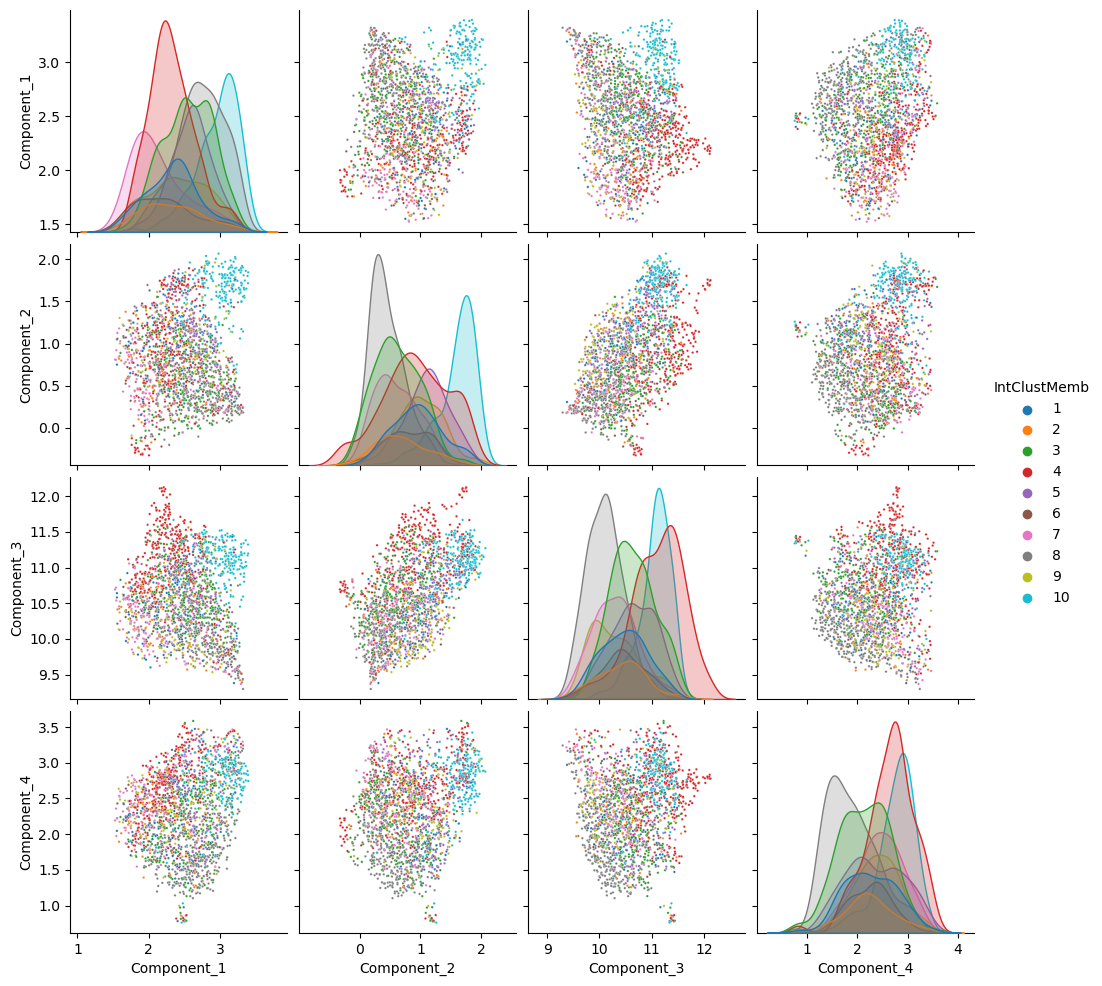

In [49]:
sns.pairplot(data_umap_df_opt,hue='IntClustMemb',palette='tab10',plot_kws={"s": 3})

In [47]:
data_umap_df_opt.to_csv('Input_data/UMAP_OPT_METABRIC_4cmp_IC10_full.csv')

## PCA+UMAP

In [ ]:
n_comp=None
#For EXP
pca_exp= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_exp.fit(data_exp_sub.T)
X_pca_exp=pca_exp.transform(data_exp_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_exp.shape))

#For CNV
pca_cnv= PCA(n_components=n_comp,random_state=seed,svd_solver='randomized')
pca_cnv.fit(data_cnv_sub.T)
X_pca_cnv=pca_cnv.transform(data_cnv_sub.T)
print("X truncated is a sparse matrix with shape: %s" % str(X_pca_cnv.shape))

#For CNV TF-IDF
svd_cnv=TruncatedSVD(random_state=seed)
svd_cnv.fit(tdfidf_cnv)
X_svd_cnv=svd_cnv.transform(tdfidf_cnv)
print("X truncated is a sparse matrix with shape: %s" % str(X_svd_cnv.shape))

X truncated is a sparse matrix with shape: (1980, 1980)
X truncated is a sparse matrix with shape: (1980, 1980)
X truncated is a sparse matrix with shape: (1980, 2)


First 2 comp exp: 0.1682606076926819 % variance
1223
First 2 comp cna: 0.2125581981191217 % variance
200
First 2 comp cna tdf-idf: 1.0 % variance
1


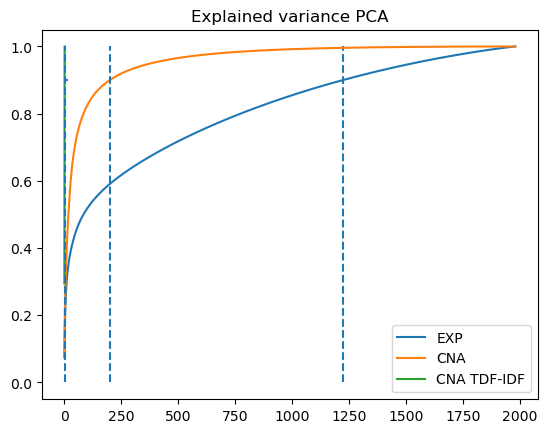

In [ ]:
#For EXPR
ev_cumsum = np.cumsum(pca_exp.explained_variance_)/(pca_exp.explained_variance_).sum()
ev_at90_exp = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 2 comp exp: {} % variance'.format(ev_cumsum[2]))
print (ev_at90_exp)
plt.title('Explained variance for expr PCA')
plt.plot(ev_cumsum,label='EXP')
plt.vlines(ev_at90_exp, 0, 1, linestyles='dashed')




#For CNA
ev_cumsum= np.cumsum(pca_cnv.explained_variance_)/(pca_cnv.explained_variance_).sum()
ev_at90_cna = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 2 comp cna: {} % variance'.format(ev_cumsum[2]))
print (ev_at90_cna)
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA')
plt.vlines(ev_at90_cna ,0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 15, linestyles='dashed')
plt.legend()


#For CNA TDF-IDF
ev_cumsum= np.cumsum(svd_cnv.explained_variance_)/(svd_cnv.explained_variance_).sum()
ev_at90 = ev_cumsum[ev_cumsum<0.9].shape[0]
print('First 2 comp cna tdf-idf: {} % variance'.format(ev_cumsum[1]))
print (ev_at90)
plt.title('Explained variance PCA')
plt.plot(ev_cumsum,label='CNA TDF-IDF')
plt.vlines(ev_at90, 0, 1, linestyles='dashed')
plt.hlines(0.9, 0, 15, linestyles='dashed')
plt.legend()


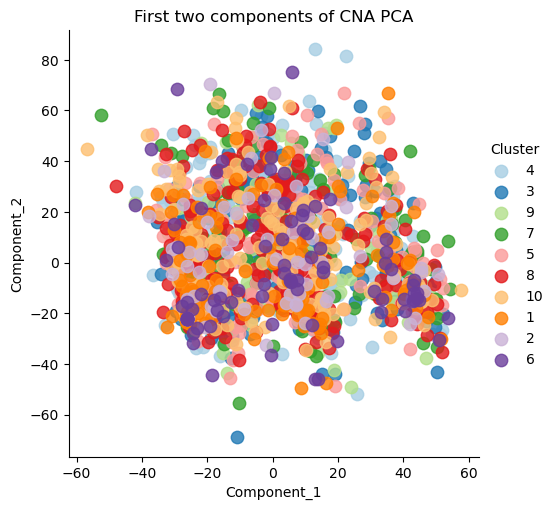

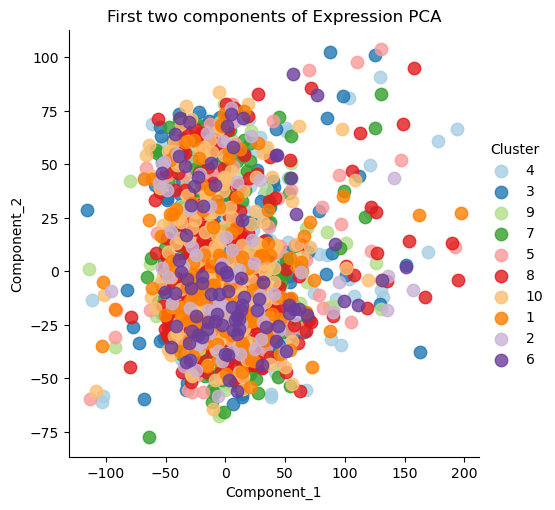

In [ ]:
#Merge exp and cna
df_pca_cna_1=Visual_comp(X_pca_cnv[:,:ev_at90_cna],ev_at90_cna,list(ic10),tag='CNA PCA')
df_pca_exp_1=Visual_comp(X_pca_exp[:,:ev_at90_exp],ev_at90_exp,list(ic10),tag='Expression PCA')


In [ ]:
df_pca_cna_1.set_index(data_cnv_sub.columns,inplace=True)
df_pca_exp_1.set_index(data_exp_sub.columns,inplace=True)

In [ ]:
df_tot_pca=df_pca_exp_1.drop('Cluster',axis=1).join(df_pca_cna_1, lsuffix='_exp', rsuffix='_cna')

### Perform Umap

In [ ]:
mapper=umap.UMAP(n_components=4, random_state=seed).fit(df_tot_pca)
data_pca_umap= mapper.transform(df_tot_pca)

In [ ]:
col_umap=[]
for i in range(1,data_pca_umap.shape[1]+1):
    col_umap.append('Component_{}'.format(i))
df_tot_pca_umap=pd.DataFrame(data_pca_umap,columns=col_umap,index=df_tot_pca.index)
df_tot_pca_umap=df_tot_pca_umap.join(ic10.astype(int),how='inner')
df_tot_pca_umap.rename(columns={'INTCLUST':'IntClustMemb'},inplace=True)


/CTGlab/home/valeria/miniconda3/envs/daism/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


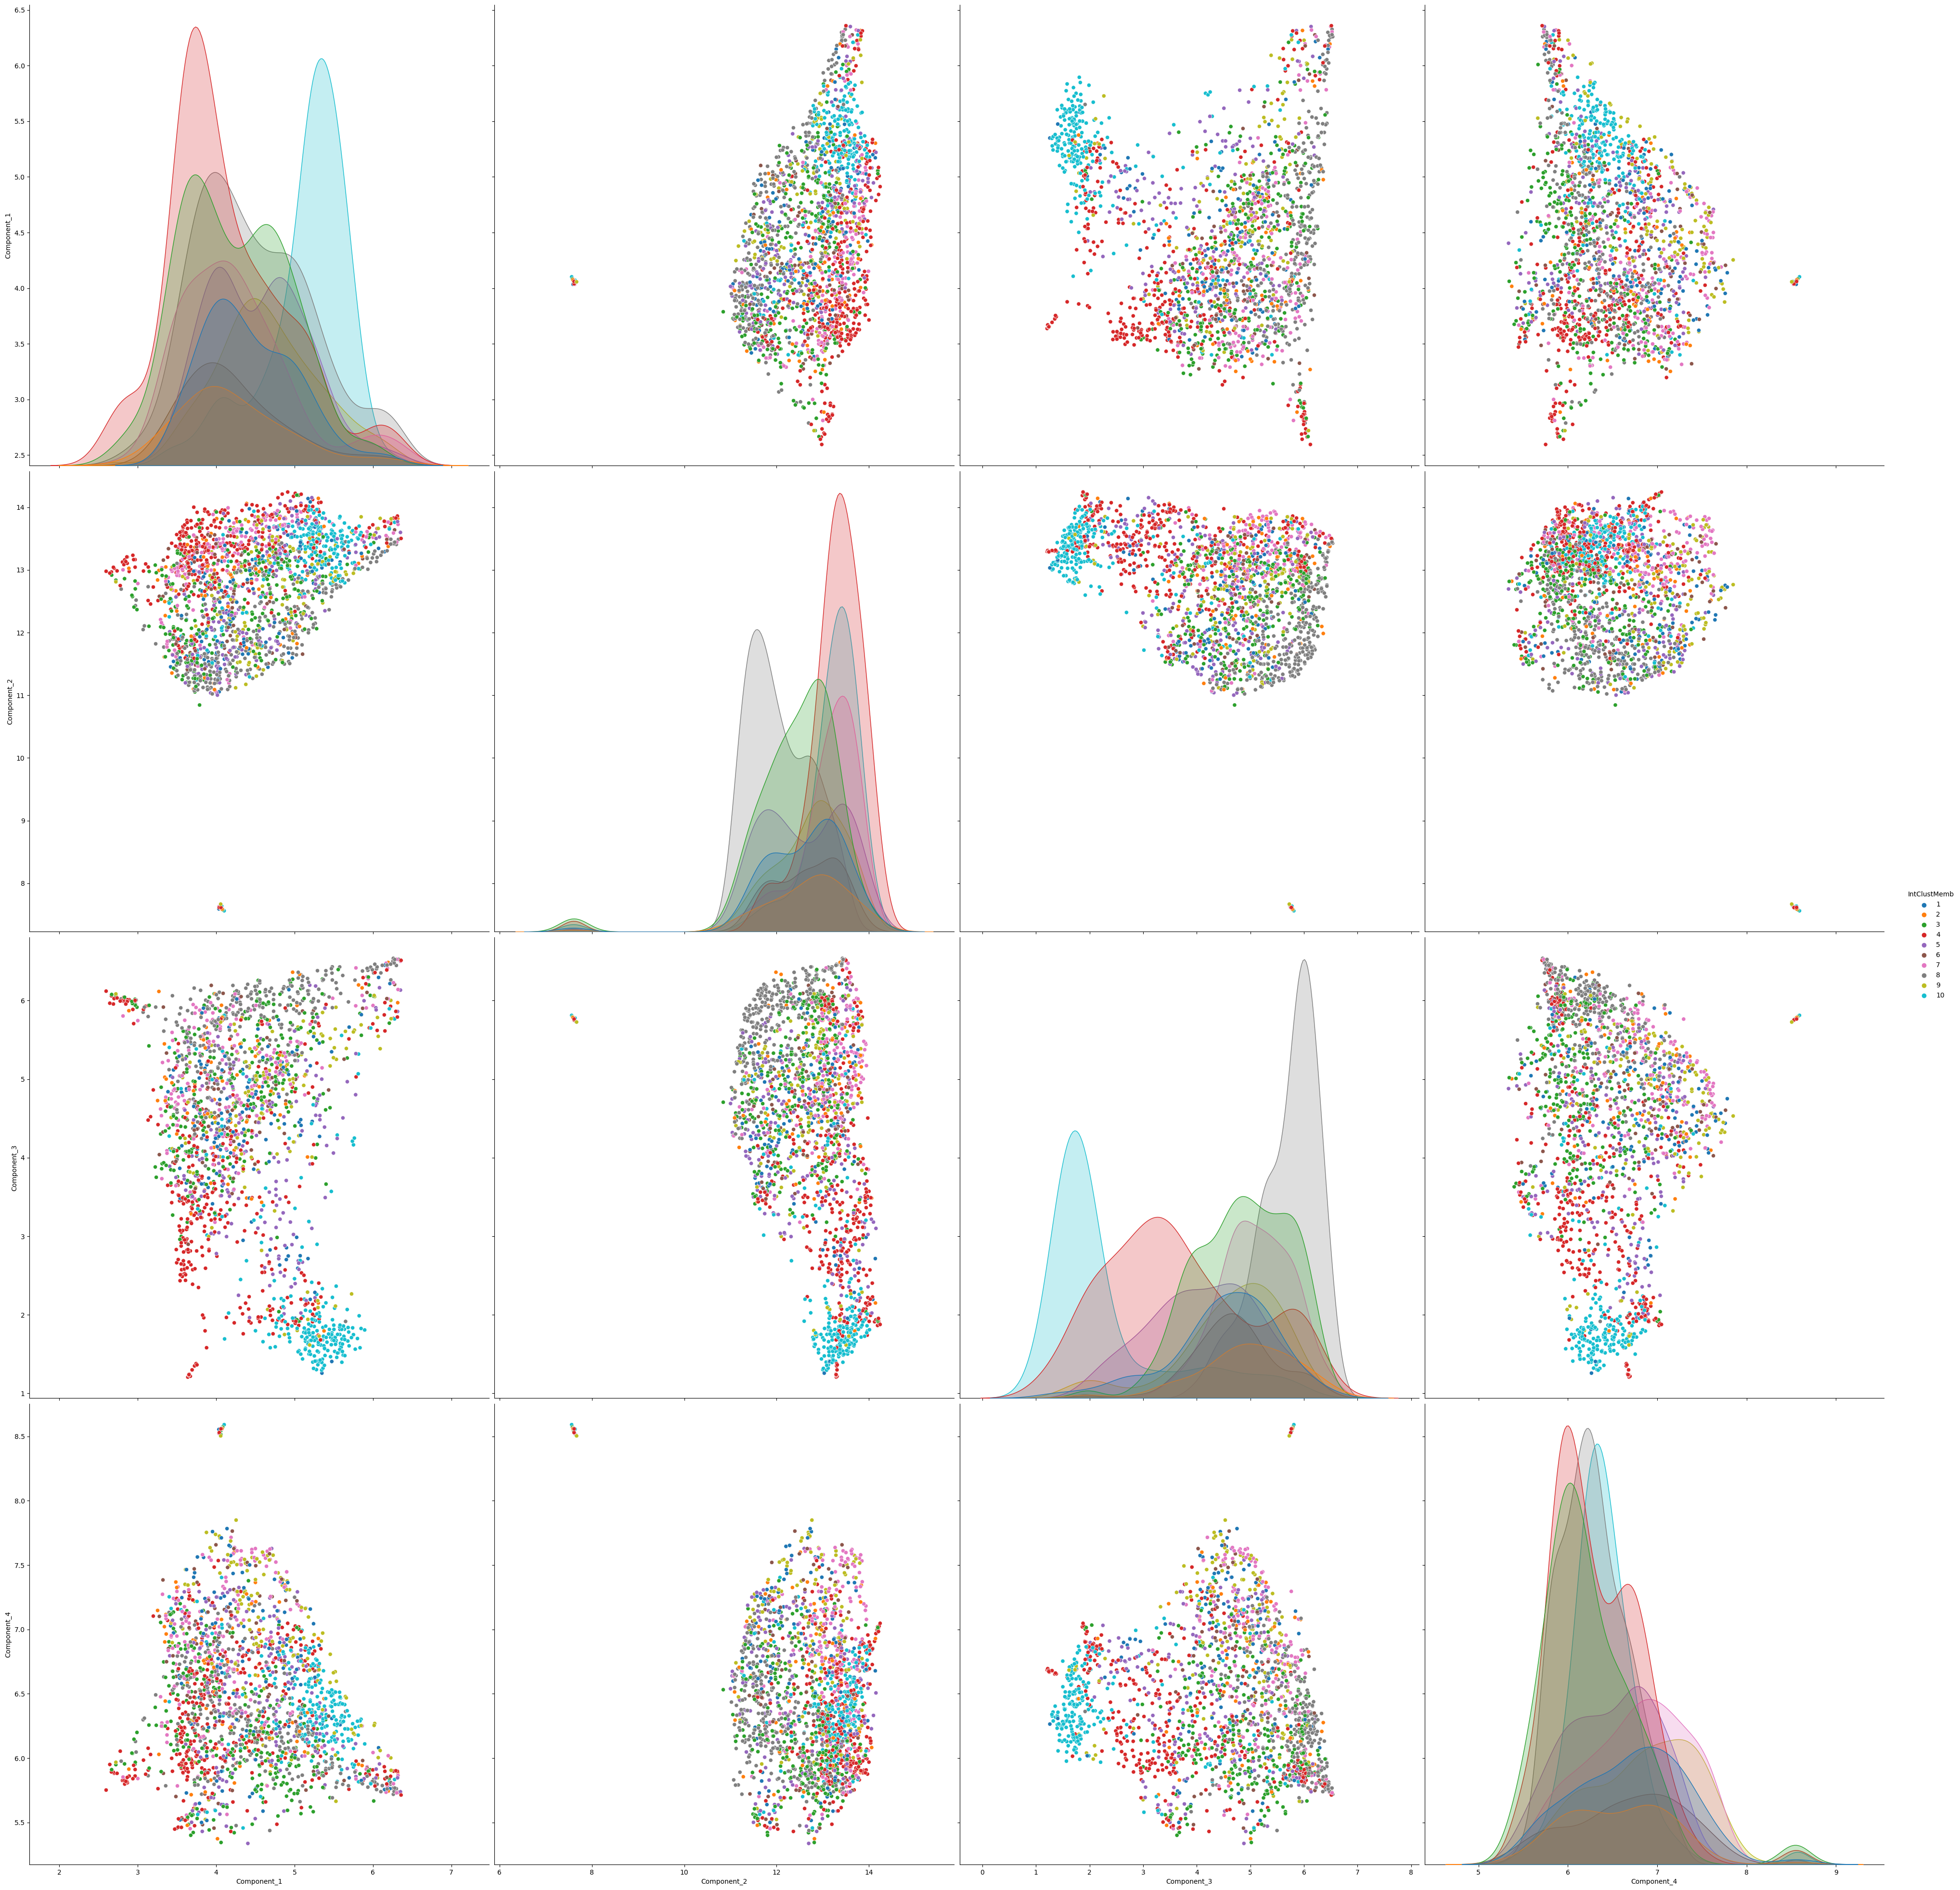

In [ ]:
sns.pairplot(df_tot_pca_umap,hue='IntClustMemb',palette='tab10',size=10)

In [ ]:
#save pca+umap
df_tot_pca_umap.to_csv('./PCA_UMAP_METABRIC_4cmp_IC10_full.csv',sep=',')

# Merge Data and save

Merge datasets and Save file


In [ ]:
df_pca_cna.set_index(data_cnv_sub.columns,inplace=True)
df_pca_exp.set_index(data_exp_sub.columns,inplace=True)

In [ ]:
df_tot=df_pca_exp.drop('Cluster',axis=1).join(df_pca_cna, lsuffix='_exp', rsuffix='_cna')



Stratification Integrative Clustering--> 10 classes significant in terms of survival and respons


In [ ]:
df_tot_sub=df_tot.join(ic10.astype(int),how='inner')
df_tot_sub.rename(columns={'INTCLUST':'IntClustMemb'},inplace=True)



In [ ]:
sns.lmplot( x="Component_1_exp", y="Component_1_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 4)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

In [ ]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 10)| (df_tot_sub.IntClustMemb == 4)| (df_tot_sub.IntClustMemb == 5)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='PCA_IC10')

In [ ]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub.loc[(df_tot_sub.IntClustMemb == 8) | (df_tot_sub.IntClustMemb == 10)| (df_tot_sub.IntClustMemb == 4)], 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='PCA_IC10')

In [ ]:
sns.lmplot( x="Component_1_exp", y="Component_2_exp",
    data=df_tot_sub, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

In [ ]:
sns.lmplot( x="Component_1_cna", y="Component_2_cna",
    data=df_tot_sub, 
    palette=sns.color_palette("Paired"),
    fit_reg=False, 
    hue='IntClustMemb', # color by cluster
    legend=True,
    scatter_kws={"s": 20}).set(title='First two components of exp')

In [ ]:
# crea il pairplot
col=['IntClustMemb', 'Component_1_exp', 'Component_2_exp', 'Component_1_cna', 'Component_2_cna']
sns.pairplot(data=df_tot_sub[col], hue='IntClustMemb',size=10,palette='tab10')
plt.show()

Save model in csv 

In [ ]:
#save ic10
df_tot_sub.to_csv('./PCA_METABRIC_10cmp_IC10_full.csv',sep=',')